# Optimizacion de gastos de Marketing

Trabajas en el departamento analítico de Y.Afisha y debes ayudar a optimizar los gastos de marketing.

Cuentas con registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018, un archivo con los pedidos en este periodo y estadísticas de gastos de marketing.

Investiga:
- cómo los clientes usan el servicio
- cuándo empiezan a comprar
- cuánto dinero aporta cada cliente a la compañía
- cuándo los ingresos cubren el costo de adquisición de los clientes

## Preparar los datos

Descarga los datasets y optimizalos.

In [1]:
# Se importan las librerias a usar en el proyecto
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Se cargan todos los datasets
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

### Visits

In [3]:
# Se muestra la info del df visits en busca de mejoras
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [4]:
# Se muestran los valores de la columna Device
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [5]:
# Se transforma la columna Device a tipo category
visits['Device'] = visits['Device'].astype('category')
visits['Device'].dtypes

CategoricalDtype(categories=['desktop', 'touch'], ordered=False)

In [6]:
# Se transforman las columnas End Ts y Start Ts a tipo datetime
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits[['End Ts', 'Start Ts']].dtypes

End Ts      datetime64[ns]
Start Ts    datetime64[ns]
dtype: object

In [7]:
# Se muestra la info del df visits para observar mejoras
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [8]:
# Se ponen los nombres de las columnas en formato
visits.columns = visits.columns.str.lower()
visits.columns = visits.columns.str.replace(' ', '_')
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

Se convirtieron las columnas correspondientes al tipo de dato correcto.
Se cambio el formato de los nombres de las columnas.

### Orders

In [9]:
# Se muestra la info del df orders en busca de mejoras
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [10]:
# Se transforma la columna Buy Ts a datetime
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders['Buy Ts'].dtypes

dtype('<M8[ns]')

In [11]:
# Se pone formato a los nombres de las columnas
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(' ', '_')
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [12]:
# Se verifican las mejoras
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Se convirtieron las columnas correspondientes al tipo de dato correcto.
Se cambio el formato de los nombres de las columnas.

### Costs

In [13]:
# Se muestra la info del df costs en busca de mejoras
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [14]:
# Se transforma la columna dt al tipo datetime
costs['dt'] = pd.to_datetime(costs['dt'])
costs['dt'].dtypes

dtype('<M8[ns]')

In [15]:
# Se observan las mejoras
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Se transforma la columna correspondiente al tipo de dato correcto.

### Conclusiones

 - Se transformaron las columnas de todos los dfs a los tipos de dato correctos (category y datetime)
 - Se puso formato a los nombres de las columnas de los dfs
 - Se dejaron intactas las columnas con tipos de dato numerico (int64, uint64, float64) ya que parece el apropiado

## Informes y Metricas

1. Visitas:
 - ¿Cuántas personas usan el sitio al día/semana/mes? (DAU, WAU, MAU)
 - ¿Cuántas sesiones hay por día? (usuarios puede tener más de una sesión).
 - ¿Cuánto dura de cada sesión?
 - ¿Con qué frecuencia los usuarios y las usuarias regresan? (sticky factor)

2. Ventas:
     
 - ¿Cuándo la gente empieza a comprar? (tiempo de conversion en dias para cada cohorte mensual y cada canal de mkt)
 - ¿Cuántos pedidos hacen durante un período de tiempo dado?
 - ¿Cuál es el tamaño promedio de compra?
 - ¿Cuánto dinero traen? (LTV)

3. Marketing:
     
 - ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
 - ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes? (CAC para cada fuente)
 - ¿Cuán rentables eran las inversiones? (ROMI)

Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo. 

### Visitas

In [16]:
# Se agregan las columnas necesarias al df visits
visits['month_ts'] = visits['start_ts'].dt.to_period('M').dt.start_time
visits['week_ts'] = visits['start_ts'].dt.to_period('W').dt.start_time
visits['date_ts'] = visits['start_ts'].dt.to_period('D').dt.start_time
visits.head()

,device,end_ts,source_id,start_ts,uid,month_ts,week_ts,date_ts
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-18,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-19,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-14,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-25,2017-12-27


In [17]:
# Se calculan los usuarios activos mensuales
mau = visits.groupby('month_ts').agg({'uid':'nunique'}).reset_index()
mau.columns = ['month_ts', 'n_users']
print(mau)
print('Average Monthly Active Users (MAU): ', int(mau['n_users'].mean()))

     month_ts  n_users
0  2017-06-01    13259
1  2017-07-01    14183
2  2017-08-01    11631
3  2017-09-01    18975
4  2017-10-01    29692
5  2017-11-01    32797
6  2017-12-01    31557
7  2018-01-01    28716
8  2018-02-01    28749
9  2018-03-01    27473
10 2018-04-01    21008
11 2018-05-01    20701
Average Monthly Active Users (MAU):  23228


In [18]:
# Se calculan los usuarios activos semanales
wau = visits.groupby('week_ts').agg({'uid':'nunique'}).reset_index()
wau.columns = ['week_ts', 'n_users']
print(wau.head())
print('Average Weekly Active Users (WAU): ', int(wau['n_users'].mean()))

     week_ts  n_users
0 2017-05-29     2021
1 2017-06-05     4129
2 2017-06-12     2812
3 2017-06-19     2878
4 2017-06-26     3064
Average Weekly Active Users (WAU):  5716


In [19]:
# Se calculan los usuarios activos diarios
dau = visits.groupby('date_ts').agg({'uid':'nunique'}).reset_index()
dau.columns = ['date_ts', 'n_users']
print(dau.head())
print('Average Daily Active Users (DAU): ', int(dau['n_users'].mean()))

     date_ts  n_users
0 2017-06-01      605
1 2017-06-02      608
2 2017-06-03      445
3 2017-06-04      476
4 2017-06-05      820
Average Daily Active Users (DAU):  907


In [20]:
# Se calculan la cantidad sesiones diarias
print(visits.groupby('date_ts').agg({'start_ts':'count'}))

print('Cantidad promedio de sesiones diarias: ', int(visits.groupby('date_ts').agg({'start_ts':'count'}).mean()))

            start_ts
date_ts             
2017-06-01       664
2017-06-02       658
2017-06-03       477
2017-06-04       510
2017-06-05       893
...              ...
2018-05-27       672
2018-05-28      1156
2018-05-29      1035
2018-05-30      1410
2018-05-31      2256

[364 rows x 1 columns]
Cantidad promedio de sesiones diarias:  987


In [21]:
# Se calcula la duracion de cada sesion
visits['duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()
visits['duration_sec'].describe()

count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: duration_sec, dtype: float64

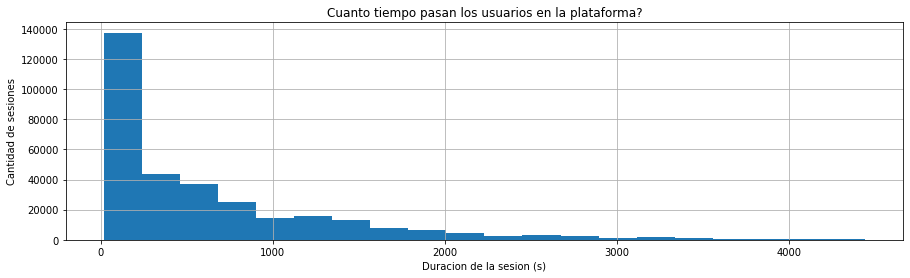

In [22]:
# Se excluyen datos errados y se grafica el histograma
percentile_99 = visits['duration_sec'].quantile(0.99) # rechazamos el top 1% (parece ser que la sesion se quedo abierta)
visits[(visits['duration_sec'] > 0) & (visits['duration_sec'] < percentile_99)]['duration_sec'].hist(bins=20,
                                                                                                    figsize=(15,4))
plt.xlabel('Duracion de la sesion (s)')
plt.ylabel('Cantidad de sesiones')
plt.title('Cuanto tiempo pasan los usuarios en la plataforma?')
plt.show()

In [23]:
# Se imprime la duracion de una sesion tipica, se usa la moda debido a la forma de la distribucion
print('Tipical Session Duration (sec): ', int(visits['duration_sec'].mode()))

Tipical Session Duration (sec):  60


In [24]:
# Si consideramos sesiones validas aquellas superiores a 60 segundos
visits[(visits['duration_sec'] >= 61) & (visits['duration_sec'] < percentile_99)]['duration_sec'].describe()

count    266104.000000
mean        765.501909
std         761.260522
min         120.000000
25%         240.000000
50%         480.000000
75%        1080.000000
max        4440.000000
Name: duration_sec, dtype: float64

In [25]:
# Se imprime la moda y la mediana
print('Tipical Session Duration (sec): ', int(visits[(visits['duration_sec'] >= 61)].mode()['duration_sec']))
print('Median Session Duration (sec):' , int(visits[(visits['duration_sec'] >= 61) & (visits['duration_sec'] < percentile_99)]['duration_sec'].median()))

Tipical Session Duration (sec):  120
Median Session Duration (sec): 480


In [26]:
# Se calcula el sticky factor
sticky_factor_daily = dau['n_users'].mean() / mau['n_users'].mean()
sticky_factor_weekly = wau['n_users'].mean() / mau['n_users'].mean()

print('Sticky factor (daily): ', sticky_factor_daily)
print('Sticky factor (weekly): ', sticky_factor_weekly)

Sticky factor (daily):  0.03908969652437603
Sticky factor (weekly):  0.24608845988292505


Se calcularon las metricas de MAU, WAU y DAU obteniendo valores que rodean los 23k, 5.7k y 900 usuarios activos respectivamente.

El portal cuenta con un aproximado de mil sesiones diarias. La mayoria de las sesiones duran un minuto. Sin contar estas sesiones, las sesiones en promedio duran 4 minutos (mediana).

El sticky factor daily es del 4% y el sticky factor weekly es del 25%.

### Ventas

In [27]:
# Se calculan las fechas de primeras compras
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_buy_ts']
first_orders.head()

,uid,first_buy_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [28]:
# Se calculan las fechas de registro
register = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
register.columns = ['uid', 'register_ts']
register.head()

,uid,register_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [29]:
# Se agregan los datos de registro y primeras compras
register_first_orders = register.merge(first_orders, on='uid')
# Se calculan la conversion
register_first_orders['conversion_days'] = (
    register_first_orders['first_buy_ts'] - register_first_orders['register_ts']
).dt.days
register_first_orders.head()

,uid,register_ts,first_buy_ts,conversion_days
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


In [30]:
# Se calculan el mes de la primera sesion para cada usuario
first_month = visits.groupby('uid').agg({'month_ts': 'min'}).reset_index()
first_month.columns = ['uid', 'first_month_ts']
first_month.head()

,uid,first_month_ts
0,11863502262781,2018-03-01
1,49537067089222,2018-02-01
2,297729379853735,2017-06-01
3,313578113262317,2017-09-01
4,325320750514679,2017-09-01


In [31]:
# Se agregan los datos de mes de primera sesion y conversion de cada usuario
# Se calcula la conversion y el canal de marketing mas popular por cohorte
cohrots_conversion = ((((
    visits
    ).merge(register_first_orders, on='uid')
).merge(first_month, on='uid')
).groupby(by=['first_month_ts'])
).agg({
    'conversion_days': 'mean',
    'source_id': pd.Series.mode
}).reset_index()
cohrots_conversion.columns = ['cohorts', 'conversion_days', 'source_id']
cohrots_conversion

,cohorts,conversion_days,source_id
0,2017-06-01,66.346373,2
1,2017-07-01,62.838226,4
2,2017-08-01,57.415224,4
3,2017-09-01,38.480889,4
4,2017-10-01,25.796777,4
5,2017-11-01,22.893568,4
6,2017-12-01,14.746083,4
7,2018-01-01,11.799419,4
8,2018-02-01,7.656437,4
9,2018-03-01,4.298438,4


Cada cohorte presenta un tiempo promedio de conversion distinto, desde 2 meses hasta 0 dias. El tiempo de conversion se ha ido reduciendo con el pasar de los meses. La ultima cohorte tarda entre 0d y 1d en convertir.

El canal mas utilizado por (casi) todas las cohortes es el numero 4 (salvo por la primera, que es el numero 2).

In [32]:
# Se calculan los retornos
cohorts_return = visits.merge(first_month, on='uid').groupby(['first_month_ts', 'month_ts']).agg({'start_ts': 'count'}).reset_index(
)
cohorts_return['age'] = (
cohorts_return['month_ts'] - cohorts_return['first_month_ts']
) / np.timedelta64(1,'M')
cohorts_return['age'] = cohorts_return['age'].round().astype(int)
cohorts_return

,first_month_ts,month_ts,start_ts,age
0,2017-06-01,2017-06-01,16505,0
1,2017-06-01,2017-07-01,2412,1
2,2017-06-01,2017-08-01,1758,2
3,2017-06-01,2017-09-01,2260,3
4,2017-06-01,2017-10-01,2679,4
...,...,...,...,...
73,2018-03-01,2018-04-01,1338,1
74,2018-03-01,2018-05-01,894,2
75,2018-04-01,2018-04-01,18010,0
76,2018-04-01,2018-05-01,1350,1


In [33]:
# Se presentan en forma de tabla dinamica
cohorts_return_pivot = cohorts_return.pivot_table(index='first_month_ts', columns='age', values='start_ts', aggfunc='mean')
cohorts_return_pivot

age,0,1,2,3,4,5,6,7,8,9,10,11
first_month_ts,,,,,,,,,,,,
2017-06-01,16505.0,2412.0,1758.0,2260.0,2679.0,2972.0,2714.0,2232.0,2109.0,1981.0,1623.0,1618.0
2017-07-01,15416.0,1156.0,1168.0,1280.0,1395.0,1079.0,938.0,959.0,813.0,596.0,570.0,NaN
2017-08-01,11441.0,1201.0,1025.0,1046.0,899.0,755.0,613.0,727.0,505.0,459.0,NaN,NaN
2017-09-01,19278.0,2190.0,1931.0,1402.0,977.0,951.0,901.0,583.0,582.0,NaN,NaN,NaN
2017-10-01,30729.0,3309.0,2116.0,1481.0,1280.0,1197.0,781.0,789.0,NaN,NaN,NaN,NaN
2017-11-01,33316.0,3801.0,2221.0,1873.0,1422.0,863.0,887.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,29972.0,2274.0,1490.0,1167.0,675.0,680.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,26061.0,2275.0,1446.0,757.0,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,25632.0,1988.0,784.0,695.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Se calculan las tasas de retorno
cohorts_return_rates = cohorts_return_pivot.copy()
initial = cohorts_return_pivot[0]

for col in cohorts_return_rates.columns:
    cohorts_return_rates[col] = cohorts_return_rates[col] / initial

cohorts_return_rates

age,0,1,2,3,4,5,6,7,8,9,10,11
first_month_ts,,,,,,,,,,,,
2017-06-01,1.0,0.146138,0.106513,0.136928,0.162314,0.180067,0.164435,0.135232,0.127779,0.120024,0.098334,0.098031
2017-07-01,1.0,0.074987,0.075765,0.083031,0.090490,0.069992,0.060846,0.062208,0.052737,0.038661,0.036975,NaN
2017-08-01,1.0,0.104973,0.089590,0.091426,0.078577,0.065991,0.053579,0.063543,0.044139,0.040119,NaN,NaN
2017-09-01,1.0,0.113601,0.100166,0.072725,0.050680,0.049331,0.046737,0.030242,0.030190,NaN,NaN,NaN
2017-10-01,1.0,0.107683,0.068860,0.048196,0.041654,0.038953,0.025416,0.025676,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.114089,0.066665,0.056219,0.042682,0.025903,0.026624,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.075871,0.049713,0.038936,0.022521,0.022688,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.087295,0.055485,0.029047,0.024941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.077559,0.030587,0.027115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


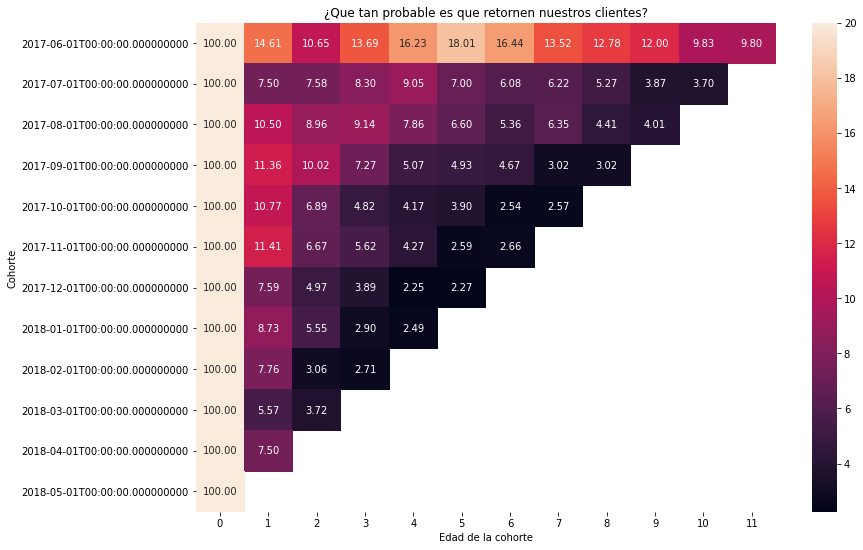

In [35]:
# Se presentan en forma de mapa de calor
plt.figure(figsize=(13, 9))
sns.heatmap(
    cohorts_return_rates*100,
    annot=True,
    fmt='.2f',
    vmax=20
)
plt.title('¿Que tan probable es que retornen nuestros clientes?')
plt.ylabel('Cohorte')
plt.xlabel('Edad de la cohorte')
plt.show()

In [36]:
# Se agregan los datos de mes primera sesion y pedidos de cada usuario
# Se calcula el numero de pedidos por mes, el ingreso por mes y el tamanho medio de pedido para cada mes para cada cohorte
cohorts_purchases = ((((
    visits
).merge(first_month, on='uid')
).merge(orders, on='uid')
).groupby(by=['first_month_ts', 'month_ts'])
).agg({
    'buy_ts': 'count',
    'revenue': ['sum', 'median']
}).reset_index(
)
cohorts_purchases.columns = ['cohort', 'month_ts','avg_n_purchases', 'avg_revenue', 'avg_purchase_size']
# Se calcula el numero promedio de pedidos por mes, el ingreso promedio por mes y 
# el tamanho promedio de pedido por mes para cada cohorte
cohorts_purchases = cohorts_purchases.groupby(
    by=['cohort']
).agg({
    'avg_n_purchases': 'mean',
    'avg_revenue': 'mean',
    'avg_purchase_size': 'mean'
}).reset_index()
cohorts_purchases

,cohort,avg_n_purchases,avg_revenue,avg_purchase_size
0,2017-06-01,37325.166667,327486.115000,3.735000
1,2017-07-01,2180.000000,15335.669091,3.752727
2,2017-08-01,5097.500000,54418.941000,4.453000
3,2017-09-01,3579.555556,136616.107778,8.123889
4,2017-10-01,3277.125000,21379.517500,2.921250
5,2017-11-01,8406.857143,35305.761429,2.748571
6,2017-12-01,4872.000000,36251.113333,2.585000
7,2018-01-01,4847.000000,26821.826000,2.815000
8,2018-02-01,4807.500000,20492.527500,2.705000
9,2018-03-01,11554.000000,48423.136667,2.626667


In [37]:
cohorts_purchases['avg_n_purchases'][1:].describe()

count       11.000000
mean      5239.503427
std       2620.919533
min       2180.000000
25%       3647.777778
50%       4847.000000
75%       5197.250000
max      11554.000000
Name: avg_n_purchases, dtype: float64

In [38]:
cohorts_purchases['avg_purchase_size'].describe()

count    12.000000
mean      3.511759
std       1.572508
min       2.440000
25%       2.685417
50%       2.868125
75%       3.739432
max       8.123889
Name: avg_purchase_size, dtype: float64

Las cohortes hacen entre 2k a 12k pedidos al mes (excluyendo a la primera con 37k pedidos mensuales, caso claramente atipico) con un promedio de 5k pedidos mensuales.

Cada mes los tamanho de los pedidos para cada cohorte tienen enormes variaciones. Por ello, consideramos la mediana de los tamnahos de pedido de cada mes (por cohorte). De esta manera, nuestro indicador no se ve sesgado por pedidos de gran tamanho.

Podemos considerar que el pedido promedio mensual de cada cohorte oscila entre 2 y 4, con un tamanho promedio de compra de 3 (promedio sobre todos los meses).

In [39]:
# Se calcula el tamanho de cada cohorte
cohorts_sizes = first_month.groupby('first_month_ts').agg({'uid': 'nunique'}).reset_index()
cohorts_sizes.columns = ['cohorts', 'n_users']
cohorts_sizes

,cohorts,n_users
0,2017-06-01,13259
1,2017-07-01,13140
2,2017-08-01,10181
3,2017-09-01,16704
4,2017-10-01,25977
5,2017-11-01,27248
6,2017-12-01,25268
7,2018-01-01,22624
8,2018-02-01,22197
9,2018-03-01,20589


In [40]:
# Se agregan los datos de mes primera sesion y pedidos de cada usuario
# Se calcula el numero de pedidos cada mes, el ingreso de cada mes y el numero de compradores cada mes para cada cohorte
cohorts_ltv = ((((
    visits
).merge(first_month, on='uid')
).merge(orders, on='uid')
).groupby(by=['first_month_ts', 'month_ts'])
).agg({
    'buy_ts': 'count',
    'revenue': 'sum',
    'uid': 'nunique'
}).reset_index(
)
# Se calcula la cantidad promedio de dinero que genera cada usuario (usuario comprador) cada mes para cada cohorte
cohorts_ltv['ltv'] = cohorts_ltv['revenue'] / cohorts_ltv['uid']
cohorts_ltv.rename(columns={'uid': 'n_buyers', 'buy_ts': 'n_purchases'}, inplace=True)
# Se calcula la edad de cada cohorte
cohorts_ltv['age'] = (
cohorts_ltv['month_ts'] - cohorts_ltv['first_month_ts']
) / np.timedelta64(1,'M') 
cohorts_ltv['age'] = cohorts_ltv['age'].round().astype(int)
cohorts_ltv.rename(columns={'first_month_ts': 'cohorts'}, inplace=True)
cohorts_ltv

,cohorts,month_ts,n_purchases,revenue,n_buyers,ltv,age
0,2017-06-01,2017-06-01,25988,253324.55,2923,86.665943,0
1,2017-06-01,2017-07-01,22695,190867.58,435,438.776046,1
2,2017-06-01,2017-08-01,26029,184169.16,309,596.016699,2
3,2017-06-01,2017-09-01,43823,340679.26,366,930.817650,3
4,2017-06-01,2017-10-01,49755,410873.97,455,903.019714,4
...,...,...,...,...,...,...,...
73,2018-03-01,2018-04-01,10894,45685.01,279,163.745556,1
74,2018-03-01,2018-05-01,16565,69189.45,164,421.886890,2
75,2018-04-01,2018-04-01,4913,41163.35,1890,21.779550,0
76,2018-04-01,2018-05-01,5681,35703.27,210,170.015571,1


In [41]:
# Se presentan los datos en forma de tabla dinamica (cronologicamente)
cohorts_ltv.round(2).pivot_table(index='cohorts', columns='month_ts', values='ltv', aggfunc='mean').fillna('')

month_ts,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
cohorts,,,,,,,,,,,,
2017-06-01,86.67,438.78,596.02,930.82,903.02,982.43,1315.76,1016.26,979.57,1060.37,1015.52,904.65
2017-07-01,,13.45,46.21,66.44,59.79,59.54,54.26,40.24,27.46,37.78,111.78,58.57
2017-08-01,,,18.97,201.54,157.58,294.44,245.24,185.77,194.86,384.47,663.02,833.96
2017-09-01,,,,90.36,119.0,274.32,1115.71,271.72,664.07,281.68,347.14,64.40
2017-10-01,,,,,13.18,41.91,24.66,33.88,39.13,27.86,34.73,94.33
2017-11-01,,,,,,12.22,65.85,89.79,134.96,87.87,40.68,39.00
2017-12-01,,,,,,,15.07,92.2,74.96,235.88,52.99,50.81
2018-01-01,,,,,,,,10.12,121.85,92.1,87.07,104.79
2018-02-01,,,,,,,,,11.94,58.25,47.33,76.40


In [42]:
# Se presentan los datos en forma de tabla dinamica (por ciclo de vida)
cohorts_ltv.round(2).pivot_table(index='cohorts', columns='age', values='ltv', aggfunc='mean').fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
cohorts,,,,,,,,,,,,
2017-06-01,86.67,438.78,596.02,930.82,903.02,982.43,1315.76,1016.26,979.57,1060.37,1015.52,904.65
2017-07-01,13.45,46.21,66.44,59.79,59.54,54.26,40.24,27.46,37.78,111.78,58.57,
2017-08-01,18.97,201.54,157.58,294.44,245.24,185.77,194.86,384.47,663.02,833.96,,
2017-09-01,90.36,119.0,274.32,1115.71,271.72,664.07,281.68,347.14,64.4,,,
2017-10-01,13.18,41.91,24.66,33.88,39.13,27.86,34.73,94.33,,,,
2017-11-01,12.22,65.85,89.79,134.96,87.87,40.68,39.0,,,,,
2017-12-01,15.07,92.2,74.96,235.88,52.99,50.81,,,,,,
2018-01-01,10.12,121.85,92.1,87.07,104.79,,,,,,,
2018-02-01,11.94,58.25,47.33,76.4,,,,,,,,


En promedio, el ingreso de cada usuario varia ampliamente dependiendo de su cohorte y del ciclo de vida de esta. Elaborar dos tablas dinamicas nos permite tratar de observar patrones que pueden surgir por estacionalidad (cronologicamente) o dentro del ciclo de vida de la cohorte.

Se puede observar cierto descenso en ingresos de diciembre a enero para la mayoria de cohortes pertinentes. Tambien observamos incrementos fuentes en ingresos en algunas cohortes del mes 2 al mes 3 del ciclo de vida.

No parecen haber patrones muy marcados entre las cohortes. Lo resaltante es que la primera cohorte posee un ingreso muy particular, generando altos ingresos por sus multiples compras.

Los valores atipicos de algunas cohortes dificultan la visualizacion de los datos como mapa termico.

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
    
Muchas gracias por la correccion. Estaba considerando registros y no clientes con compras. En lineas abajo presento lo solicitado
</div>

In [43]:
# Mes de la primera compra de cada cliente
#first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
#first_orders.columns = ['uid', 'first_order_month']

# Se le agregan las columnas necesarias a los dfs existentes
first_orders['first_order_month'] = first_orders['first_buy_ts'].dt.to_period('M').dt.start_time
orders['order_month'] = orders['buy_ts'].dt.to_period('M').dt.start_time

# Esta parte queda intacta
# Nuevos cliente para cada mes
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

orders_ = pd.merge(orders, first_orders, on='uid')    
cohorts_orders = orders_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
    
# Agregar datos sobre cuántos usuarios realizaron sus primeras compras en cada mes
report_orders = pd.merge(cohort_sizes, cohorts_orders, on='first_order_month')
report_orders['age'] = (report_orders['order_month'] - report_orders['first_order_month']) / np.timedelta64(1, 'M')
report_orders['age'] = report_orders['age'].round().astype('int')

# Calcular LTV: Dividir beneficio bruto de la cohorte de cada mes por el número total de usuarios de cada cohorte
report_orders['ltv'] = report_orders['revenue'] / report_orders['n_buyers'] # Se cambia gp por revenue ya que no existe columna gp
output_orders = report_orders.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1)#.round()
output_orders.fillna('')


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.64738,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.96896,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.23118,8.386854,
2017-08-01,5.276518,5.748511,6.206993,6.59827,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,,
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.25122,13.435227,,,
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,,,,
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,,,,,
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,,,,,,
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,,,,,,,
2018-02-01,4.156987,4.435262,4.513777,4.587921,,,,,,,,


### Marketing

In [44]:
# Se encuentra el mes de inversion
costs['month'] = costs['dt'].dt.to_period('M').dt.start_time
costs

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [45]:
# Se calculan los gastos totales por mes
costs_month = costs.groupby(by=['month']).agg({'costs': 'sum'})
costs_month

,costs
month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


In [46]:
# Se calculan los gastos totales por fuente
costs_source = costs.groupby(by=['source_id']).agg({'costs': 'sum'})
costs_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [47]:
# Se calculan los gastos por mes por tipo de fuente
costs_month_source = costs.groupby(by=['month', 'source_id']).agg({'costs': 'sum'})
costs_month_source

costs
month      source_id         
2017-06-01 1          1125.61
           2          2427.38
           3          7731.65
           4          3514.80
           5          2616.12
...                       ...
2018-05-01 3          9411.42
           4          4214.21
           5          3669.56
           9           362.17
           10          409.86

[84 rows x 1 columns]

In [48]:
# Se calculan los gastos mensuales tipo de fuente
costs_source_month = costs.groupby(by=['source_id', 'month']).agg({'costs': 'sum'})
costs_source_month

costs
source_id month              
1         2017-06-01  1125.61
          2017-07-01  1072.88
          2017-08-01   951.81
          2017-09-01  1502.01
          2017-10-01  2315.75
...                       ...
10        2018-01-01   614.35
          2018-02-01   480.88
          2018-03-01   526.41
          2018-04-01   388.25
          2018-05-01   409.86

[84 rows x 1 columns]

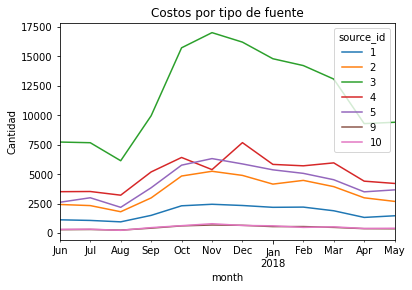

In [49]:
# Se muestra la evolucion temporal de los gastos por tipo de fuente
costs_source_month.unstack(level=0).plot()
plt.legend([1,2,3,4,5,9,10], title='source_id')
plt.ylabel('Cantidad')
plt.title('Costos por tipo de fuente')
plt.show()

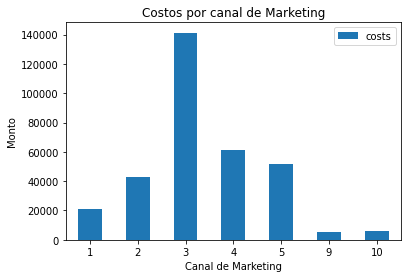

In [50]:
# Se muestran los cosotos por canal
costs_source.plot(kind='bar', rot=0)
plt.xlabel('Canal de Marketing')
plt.ylabel('Monto')
plt.title('Costos por canal de Marketing')
plt.show()

In [51]:
costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


In [52]:
# Se imprime el costo total
print('Costo total de Marketing: ', costs['costs'].sum())

Costo total de Marketing:  329131.62


In [53]:
# Se imprime el costo promedio mensual
print('Costo promedio mensual de Marketing: ', costs_month['costs'].mean().round(2))

Costo promedio mensual de Marketing:  27427.63


In [54]:
# Se imprime el costo promedio por canal
print('Costo promedio por canal de Marketing: ', costs_source['costs'].mean().round(2))

Costo promedio por canal de Marketing:  47018.8


Se puede observar que los gastos del canal 3 de marketing son mucho mas elevados que los demas canales, mas del doble del canal que le sigue (canal 4) y casi el triple que el promedio. A su vez, el canal 4 es el segundo con mayores gastos, mas este es el canal mas popular para captacion de clientes.

Los canales de marketing presentan una subida en gastos a fines de anho, proablemente por campanhas de navidad y anho nuevo.

In [55]:
# Se unen los dfs que corresponden a visitas y primeras compras de los usuarios
visits_first_purchases = visits.merge(first_orders, on='uid')
visits_first_purchases.head()

,device,end_ts,source_id,start_ts,uid,month_ts,week_ts,date_ts,duration_sec,first_buy_ts,first_order_month
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-14,2018-05-20,1440.0,2018-03-09 20:25:00,2018-03-01
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-01,2018-03-05,2018-03-09,1680.0,2018-03-09 20:25:00,2018-03-01
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-01,2017-08-28,2017-09-03,60.0,2017-09-04 12:46:00,2017-09-01
3,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017-10-01,2017-10-23,2017-10-27,2520.0,2017-09-04 12:46:00,2017-09-01
4,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017-09-01,2017-09-04,2017-09-04,1140.0,2017-09-04 12:46:00,2017-09-01


In [56]:
# Se filtran las sesiones que corresponden a primeras compras de usuarios
visits_first_purchases = visits_first_purchases[(
    visits_first_purchases['end_ts'] >= visits_first_purchases['first_buy_ts']) &
(visits_first_purchases['start_ts'] <= visits_first_purchases['first_buy_ts'])]
visits_first_purchases.head()


,device,end_ts,source_id,start_ts,uid,month_ts,week_ts,date_ts,duration_sec,first_buy_ts,first_order_month
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-01,2018-03-05,2018-03-09,1680.0,2018-03-09 20:25:00,2018-03-01
11,desktop,2017-09-04 12:51:00,3,2017-09-04 12:44:00,16007536194108375387,2017-09-01,2017-09-04,2017-09-04,420.0,2017-09-04 12:46:00,2017-09-01
222,desktop,2017-06-25 09:11:00,2,2017-06-25 08:45:00,8056418121947262981,2017-06-01,2017-06-19,2017-06-25,1560.0,2017-06-25 08:54:00,2017-06-01
356,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,2018-02-01,2018-02-12,2018-02-12,3960.0,2018-02-12 19:48:00,2018-02-01
361,desktop,2017-09-27 09:26:00,5,2017-09-27 09:21:00,2307401184189569202,2017-09-01,2017-09-25,2017-09-27,300.0,2017-09-27 09:23:00,2017-09-01


In [57]:
# Se agrupa por usuario y se encuentra el canal mas utilizado por cada comprador
buyers_mkt_src = visits_first_purchases.groupby('uid').agg(
    {'source_id': 'mean'}
).reset_index()
buyers_mkt_src.head()

,uid,source_id
0,1575281904278712,10
1,2551852515556206,5
2,3077748354309989,3
3,3605148382144603,2
4,4808417689019433,4


In [58]:
# Se encuentran la cantidad de compradores que corresponden a cada canal de mkt
mkt_src_n_buyers = buyers_mkt_src.groupby('source_id').agg({'uid': 'nunique'}).reset_index()
mkt_src_n_buyers.columns = ['source_id', 'n_buyers']
mkt_src_n_buyers

,source_id,n_buyers
0,1,3647
1,2,3031
2,3,7099
3,4,7552
4,5,5947
5,7,1
6,9,588
7,10,1029


In [59]:
# Se calcula el CAC para cada canal de mkt
mkt_src_cac = (costs_source.reset_index()).merge(mkt_src_n_buyers, on='source_id', how='right')
mkt_src_cac.fillna(0, inplace=True)
mkt_src_cac['cac'] = mkt_src_cac['costs'] / mkt_src_cac['n_buyers']
mkt_src_cac

,source_id,costs,n_buyers,cac
0,1,20833.27,3647,5.712440
1,2,42806.04,3031,14.122745
2,3,141321.63,7099,19.907259
3,4,61073.60,7552,8.087076
4,5,51757.10,5947,8.703060
5,7,0.00,1,0.000000
6,9,5517.49,588,9.383486
7,10,5822.49,1029,5.658397


In [60]:
mkt_src_cac[mkt_src_cac['cac'] > 0]['cac'].describe()

count     7.000000
mean     10.224923
std       5.127553
min       5.658397
25%       6.899758
50%       8.703060
75%      11.753116
max      19.907259
Name: cac, dtype: float64

Podemos ver que el CAC de cada fuente oscila entre los 6 y 20 (con excepcion de la fuente 7 en la cual no hubo inversion) con un costo promedio aproximado de 9.

La fuente 4 es la que atrajo una mayor cantidad de clientes compradores, incluso mas que la fuente 3 que tiene un costo mucho mas elevado. Ademas de ser el medio preferido de los usuarios.

In [61]:
# Se unen los dfs que corresponden a visitas y compras de los usuarios, se filtran las sesiones que corresponden a compras
visits_orders = visits.merge(orders, on='uid', how='inner')
visits_orders = visits_orders[(
    visits_orders['end_ts'] >= visits_orders['buy_ts']) &
(visits_orders['start_ts'] <= visits_orders['buy_ts'])]
visits_orders

,device,end_ts,source_id,start_ts,uid,month_ts,week_ts,date_ts,duration_sec,buy_ts,revenue,order_month
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-01,2018-03-05,2018-03-09,1680.0,2018-03-09 20:25:00,2.33,2018-03-01
12,desktop,2017-10-28 00:04:00,3,2017-10-27 23:56:00,16007536194108375387,2017-10-01,2017-10-23,2017-10-27,480.0,2017-10-28 00:01:00,1.53,2017-10-01
29,desktop,2017-09-04 12:51:00,3,2017-09-04 12:44:00,16007536194108375387,2017-09-01,2017-09-04,2017-09-04,420.0,2017-09-04 12:46:00,2.44,2017-09-01
258,desktop,2018-03-06 14:21:00,2,2018-03-06 14:20:00,8056418121947262981,2018-03-01,2018-03-05,2018-03-06,60.0,2018-03-06 14:21:00,3.05,2018-03-01
797,desktop,2017-10-28 14:37:00,2,2017-10-28 14:29:00,8056418121947262981,2017-10-01,2017-10-23,2017-10-28,480.0,2017-10-28 14:32:00,4.28,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...
761802,desktop,2017-12-04 12:50:00,3,2017-12-04 12:42:00,6752020629696526518,2017-12-01,2017-12-04,2017-12-04,480.0,2017-12-04 12:46:00,4.15,2017-12-01
761803,desktop,2017-11-20 23:44:00,4,2017-11-20 23:33:00,11750532881998794555,2017-11-01,2017-11-20,2017-11-20,660.0,2017-11-20 23:43:00,3.67,2017-11-01
761804,touch,2017-11-29 20:48:00,4,2017-11-29 20:27:00,11202626539189016002,2017-11-01,2017-11-27,2017-11-29,1260.0,2017-11-29 20:33:00,3.05,2017-11-01
761805,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-04-01,2018-04-23,2018-04-23,480.0,2018-04-23 21:16:00,0.49,2018-04-01


In [62]:
# Se calculan los ingresos totales de cada canal de mkt
mkt_src_total_revenue = visits_orders.groupby(by=['source_id']).agg({'revenue': 'sum'}).reset_index()
mkt_src_total_revenue

,source_id,revenue
0,1,28709.91
1,2,33760.87
2,3,30449.76
3,4,34638.76
4,5,33732.60
5,7,1.22
6,9,2763.54
7,10,3089.27


In [63]:
# Se calculan los ingresos por mes para cada canal de mkt
mkt_src_revenue = visits_orders.groupby(by=['source_id', 'month_ts']).agg({'revenue': 'sum'}).reset_index()
mkt_src_revenue

,source_id,month_ts,revenue
0,1,2017-06-01,1264.19
1,1,2017-07-01,1702.28
2,1,2017-08-01,1002.10
3,1,2017-09-01,2191.52
4,1,2017-10-01,2957.53
...,...,...,...
80,10,2018-01-01,230.12
81,10,2018-02-01,281.18
82,10,2018-03-01,386.81
83,10,2018-04-01,217.04


In [64]:
# Se halla el primer mes de gastos para cada canal de mkt (son el mismo mes)
costs_source_month.reset_index().groupby('source_id').agg({'month': 'min'})
mkt_first_month = costs_source_month.reset_index().groupby('source_id').agg({'month': 'min'})['month'][1]
print('Primer es de gastos en Mkt: ', mkt_first_month)

Primer es de gastos en Mkt:  2017-06-01 00:00:00


In [65]:
# Se calcula 'revenue_month' que indica cuantos meses han pasado desde la inversion hasta el mes de ingresos
mkt_src_revenue['revenue_month'] = (
    mkt_src_revenue['month_ts'] - mkt_first_month) / np.timedelta64(1, 'M')
mkt_src_revenue['revenue_month'] = mkt_src_revenue['revenue_month'].round().astype(int)
mkt_src_revenue

,source_id,month_ts,revenue,revenue_month
0,1,2017-06-01,1264.19,0
1,1,2017-07-01,1702.28,1
2,1,2017-08-01,1002.10,2
3,1,2017-09-01,2191.52,3
4,1,2017-10-01,2957.53,4
...,...,...,...,...
80,10,2018-01-01,230.12,7
81,10,2018-02-01,281.18,8
82,10,2018-03-01,386.81,9
83,10,2018-04-01,217.04,10


In [66]:
# Se calcula el ROMI sobre la inversion total para cada canal de mkt
romi = mkt_src_revenue.merge(costs_source, on='source_id')
romi['romi'] = (romi['revenue'] / romi['costs']) * 100
romi

,source_id,month_ts,revenue,revenue_month,costs,romi
0,1,2017-06-01,1264.19,0,20833.27,6.068130
1,1,2017-07-01,1702.28,1,20833.27,8.170969
2,1,2017-08-01,1002.10,2,20833.27,4.810095
3,1,2017-09-01,2191.52,3,20833.27,10.519328
4,1,2017-10-01,2957.53,4,20833.27,14.196187
...,...,...,...,...,...,...
79,10,2018-01-01,230.12,7,5822.49,3.952261
80,10,2018-02-01,281.18,8,5822.49,4.829205
81,10,2018-03-01,386.81,9,5822.49,6.643378
82,10,2018-04-01,217.04,10,5822.49,3.727615


In [67]:
# Se presentan los datos en formato de tabla dinamica, se acumulan los retornos
romi_pivot = romi.pivot_table(index='source_id', columns='revenue_month', values='romi', aggfunc='mean').round(2)
romi_pivot.cumsum(axis=1)

revenue_month,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,6.07,14.24,19.05,29.57,43.77,60.27,75.79,86.41,97.52,114.41,125.10,137.82
2,3.13,6.35,8.02,12.11,20.61,27.22,45.42,51.46,59.74,68.53,72.05,78.88
3,1.19,2.54,3.46,5.40,7.80,10.41,13.04,14.95,17.07,19.00,20.13,21.55
4,2.41,5.80,8.09,11.14,17.86,24.71,31.94,37.08,42.59,48.86,52.78,56.71
5,3.38,7.29,10.34,17.32,26.41,31.94,38.46,43.33,49.20,56.30,60.25,65.17
9,2.51,5.81,8.02,12.26,17.70,23.99,28.53,31.50,36.32,43.25,47.11,50.08
10,3.01,4.93,8.01,10.30,17.77,24.50,27.86,31.81,36.64,43.28,47.01,53.06


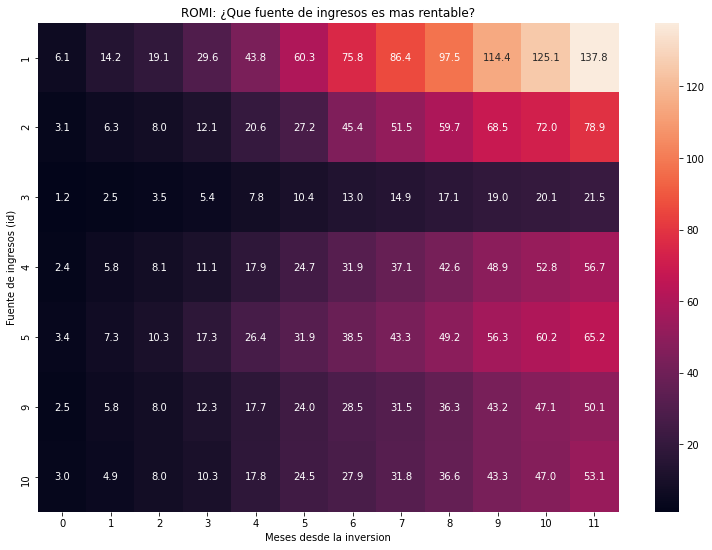

In [68]:
# Se presentan los datos como mapa de calor
plt.figure(figsize=(13, 9))
sns.heatmap(
    romi_pivot.cumsum(axis=1),
    annot=True,
    fmt='.1f'
)
plt.title('ROMI: ¿Que fuente de ingresos es mas rentable?')
plt.ylabel('Fuente de ingresos (id)')
plt.xlabel('Meses desde la inversion')
plt.show()

Podemos observar un comportamiento muy particular y hasta contraintuitivo: las fuentes en las que mas invertimos, las que atraen mas compradores y las mas populares NO son las que otorgan mayores retornos.

La unica fuente de ingresos con la que se logra recobrar la inversion es la id 1. La id 2 se encuentra cerca a un 80% luego de casi un anho y las demas se situan alrededor del 50% de ROMI.

La fuente 3 es un excelente ejemplo de una pesima inversion: es la mas costosa, la de mayor CAC, no trae la mayor cantidad de compradores y es la que tiene menor ROMI.

### Conclusiones
 - El portal cuenta con mas de 20k usarios activos mensuales y un promedio de 1k sesiones diarias (entre 1 y 4 minutos por sesion)
 - Se observa cierta estacionalidad con incrementos en las compras a fin de anho. Algunas cohortes presetan incrementos en compras entre los meses 2 y 3 del ciclo de vida. La primera cohorte es de lejos la que proporciona mayores ingresos.
 - La mayoria de canales de marketing no proporcionan un buen ROMI, solo el canal id 1 consigue un retorno positivo sobre la inversion.

## Conclusiones Generales

- La fuente recomendada es la numero 1. Si bien no es la fuente que otorgue mas ingresos, es la unica que luego de 11 meses logra un ROMI mayor al 100% y cuenta con uno de los CACs mas bajos
- Adicionalmente, se pueden evaluar las fuentes 2 y 4. Esto debido a que la 2 es la segunda con mayor ROMI con 80% y la 4 es la que otorga mas ingresos ademas de mayor numero de compradores y ser la opcion mas popular para iniciar sesiones de todas las cohortes
- Definitivamente se debe descartar la fuente 3, tiene un costo altisimo, el mayor CAC y el menor ROMI.
- Finalmente, se ha de analizar a mayor profundidad el comportamiento de la primera cohorte, ya que es la tiene mayor numero de compras y genera una mayor cantidad de ingresos.